<a href="https://colab.research.google.com/github/sravanatmoon/Artificial-Int-Sravan/blob/master/Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of Haberman dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Haberman dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

*  Objective: Classify a new Candidate as belonging to one of the 2 classes given the 3 features.




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/haberman.csv")
df.head(2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1


In [3]:
df.shape    #(number of points, numer of features), 

(306, 4)

In [4]:
df.columns   # Names of Features

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
#number of classes
df["status"].unique()

array([1, 2])

In [6]:
df["status"].value_counts()  # data-points per class
# distorted dataset upto some extent (as 74% of Examples belong to a single class while only 26% on other)

1    225
2     81
Name: status, dtype: int64

```
balancing the dataset by resample method
```

In [7]:
# learnt from an article from towardsdatascience.com
from sklearn.utils import resample

# separate minority and majority classes
class_1 = df[df['status']==1]
class_2 = df[df['status']==2]

# upsample minority
class_2_upsampled = resample(class_2, replace=True, # sample with replacement
                          n_samples=len(class_1), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
df = pd.concat([class_1, class_2_upsampled])
df["status"].value_counts()

2    225
1    225
Name: status, dtype: int64

Observations:
1. As the data was imbalanced, balanced with resampling technique

# Histogram, PDF, CDF

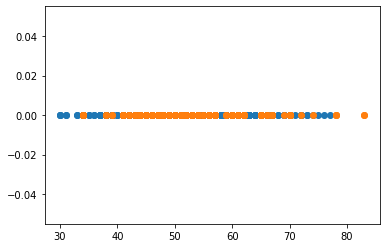

In [8]:
df_class1 = df[df["status"] == 1];
df_class2 = df[df["status"] == 2];
plt.plot(df_class1["age"], np.zeros_like(df_class1["age"]), 'o')
plt.plot(df_class2["age"], np.zeros_like(df_class2["age"]), 'o')
plt.show()

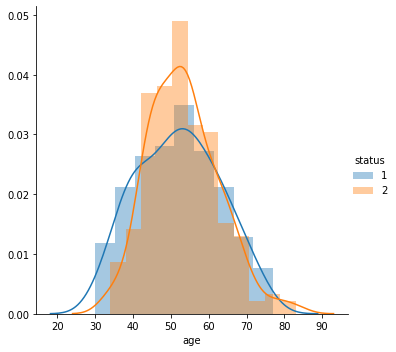

In [9]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

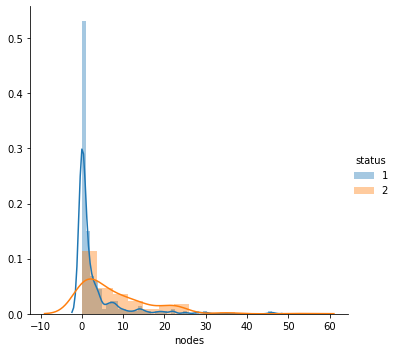

In [10]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()

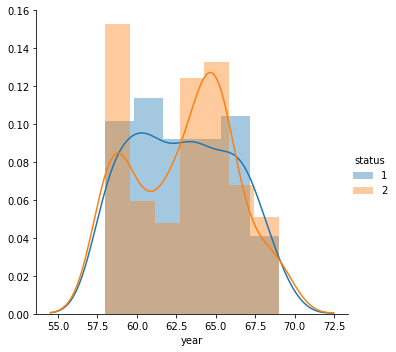

In [11]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.show()

No handles with labels found to put in legend.


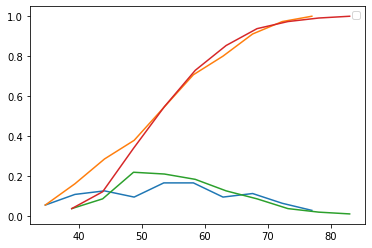

In [12]:
#class_1
frequency, age_groups = np.histogram(df_class1['age'], bins=10, density = True)
pdf = frequency/(sum(frequency))
plt.plot(age_groups[1:], pdf)
plt.plot(age_groups[1:], np.cumsum(pdf))  # cdf direct inside plot

# class_2
frequency, age_groups = np.histogram(df_class2['age'], bins=10, density = True)
pdf = frequency/(sum(frequency))
plt.plot(age_groups[1:], pdf)
plt.plot(age_groups[1:], np.cumsum(pdf))   # cdf direct inside plot
plt.legend()
plt.show()

####Obsevation:
Nothing SIgnificant to conclude anything

# Mean, Variance and Std-dev

In [13]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Age :",np.mean(df_class1["age"]), np.mean(df_class2["age"]))
print("Nodes :",np.mean(df_class1["nodes"]), np.mean(df_class2["nodes"]))
print("Year :",np.mean(df_class1["year"]), np.mean(df_class2["year"]))

print("\nStd-dev:");
print("Age :",np.std(df_class1["age"]), np.std(df_class2["age"]))
print("Nodes :",np.std(df_class1["nodes"]), np.std(df_class2["nodes"]))
print("Year :",np.std(df_class1["year"]), np.std(df_class2["year"]))


Means:
Age : 52.01777777777778 53.382222222222225
Nodes : 2.7911111111111113 7.7555555555555555
Year : 62.86222222222222 62.96

Std-dev:
Age : 10.98765547510051 9.282990152576891
Nodes : 5.857258449412131 8.372854433108504
Year : 3.2157452144021956 3.215683787660443


# Median, Percentile, Quartile, IQR, MAD

In [14]:
print("Medians:")
print("Age :",np.median(df_class1["age"]), np.median(df_class2["age"]))
print("Nodes :",np.median(df_class1["nodes"]), np.median(df_class2["nodes"]))
print("Year :",np.median(df_class1["year"]), np.median(df_class2["year"]))

Medians:
Age : 52.0 53.0
Nodes : 0.0 5.0
Year : 63.0 64.0


In [15]:
print("90th Percentiles:")
print("Age : ", np.percentile(df_class1["age"],90), np.percentile(df_class2["age"],90))
print("Nodes : ", np.percentile(df_class1["nodes"],90), np.percentile(df_class2["nodes"],61))
print("year : ", np.percentile(df_class1["year"],90), np.percentile(df_class2["year"],90))

90th Percentiles:
Age :  67.0 65.0
Nodes :  8.0 8.0
year :  67.0 67.0


Observations: 
1. 90% of the Persons of class_1 are under the age of 67, where are 90% of the members of class_2 are above 43. 
2. 90% of the Persons of class_1 were having nodes under 8 while that is only 61% for class_2 

In [16]:
print("Quartiles:")
print("Age : ", np.percentile(df_class1["age"],np.arange(0, 100, 25)), \
      np.percentile(df_class2["age"],np.arange(0, 100, 25)))
print("Nodes : ", np.percentile(df_class1["nodes"],np.arange(0, 100, 25)), \
      np.percentile(df_class2["nodes"],np.arange(0, 100, 25)))
print("year : ", np.percentile(df_class1["year"],np.arange(0, 100, 25)), \
      np.percentile(df_class2["year"],np.arange(0, 100, 25)))

Quartiles:
Age :  [30. 43. 52. 60.] [34. 47. 53. 60.]
Nodes :  [0. 0. 0. 3.] [ 0.  1.  5. 13.]
year :  [58. 60. 63. 66.] [58. 60. 64. 65.]


In [17]:
print("IQRs:")
def IQR(series):
    Q1, Q3 = np.percentile(series, [25 ,75])
    return (Q3 - Q1)

print("Age : ", IQR(df_class1["age"]), IQR(df_class2["age"]))
print("Nodes : ", IQR(df_class1["nodes"]), IQR(df_class2["nodes"]))
print("year : ", IQR(df_class1["year"]), IQR(df_class2["year"]))

IQRs:
Age :  17.0 13.0
Nodes :  3.0 12.0
year :  6.0 5.0


In [18]:
# Mean Absolute Deviation (or MAD)
from statsmodels import robust
print ("Median Absolute Deviation")
print("Age : ",robust.mad(df_class1["age"]), robust.mad(df_class2["age"]))
print("Year : ",robust.mad(df_class1["year"]), robust.mad(df_class2["year"]))
print("Nodes : ",robust.mad(df_class1["nodes"]), robust.mad(df_class2["nodes"]))

Median Absolute Deviation
Age :  13.343419966550417 10.378215529539213
Year :  4.447806655516806 2.965204437011204
Nodes :  0.0 7.41301109252801


# Box plot and Whiskers

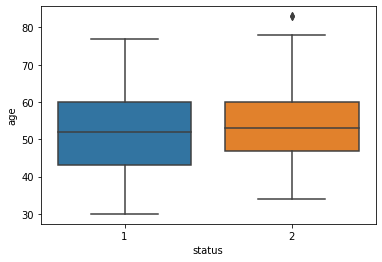

In [19]:
sns.boxplot(x='status',y='age', data=df)
plt.show()

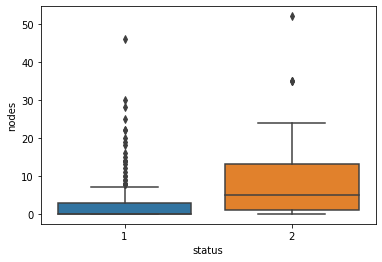

In [20]:
sns.boxplot(x='status',y='nodes', data=df)
#plt.show()

Obsrvations
1. 75% of the class_1 persons had nodes less than 3
2. 75 % of the class_2 persons had notes more than 1

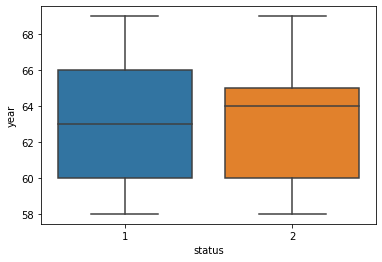

In [21]:
sns.boxplot(x='status',y='year', data=df)
plt.show()

#Violin plots

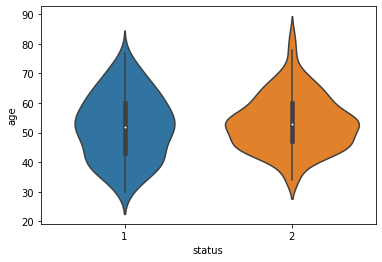

In [22]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.show()

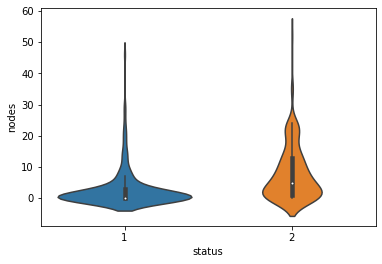

In [23]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.show()

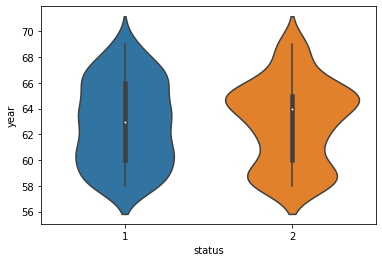

In [24]:
sns.violinplot(x="status", y="year", data=df, size=8)
plt.show()

#2-D Scatter Plot
**Observation(s):**
1. all the 3 combinations doesn't give any specific info of classification. 

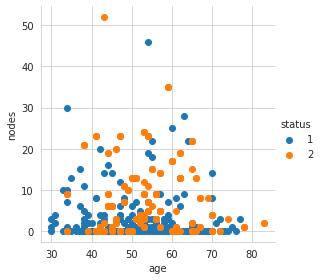

In [25]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

# data points cannot be easily seperated.

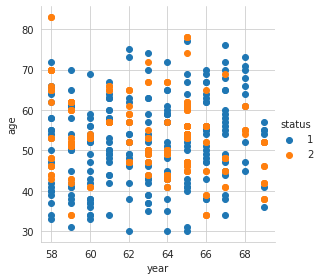

In [27]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "year", "age") \
   .add_legend();
plt.show();

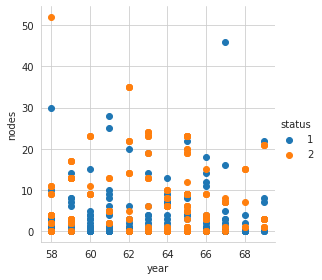

In [29]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

# Pair-plot

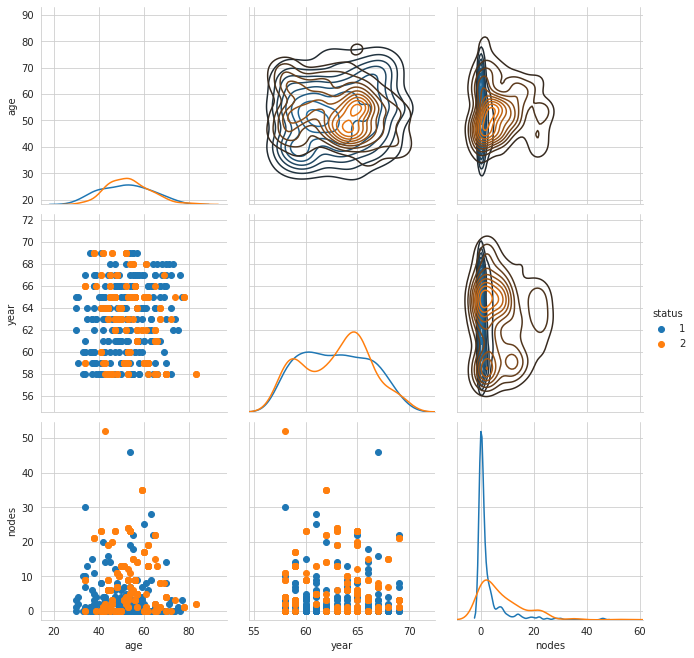

In [31]:
sns.set_style("whitegrid");
Grid = sns.PairGrid(df, hue="status", height=3)

Grid.map_upper(sns.kdeplot)
Grid.map_lower(plt.scatter)
Grid.map_diag(sns.kdeplot)
Grid.add_legend()
#Grid.show()

**Observations**
1. None of the feature individually give insight about the required class classificatin, we have to further explore

# 3D-Plot

In [32]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='year', z='nodes', color='status')
fig.show()